## SWAP Test

For two qubits $|a\rangle, |b\rangle$, the SWAP test is a quantum circuit that computes the inner product of the two qubits.

**Q.** Is there a way to extract $|\left<a|b\right>|^2$ of tensor product states $|a\rangle, |b\rangle$?

**A.** "Ancilla qubit"

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [6]:
qml.drawer.use_style(style='sketch')

In [2]:
wires = ['a', 'q1', 'q2']
dev = qml.device('default.qubit', wires=wires)

In [9]:
@qml.qnode(dev)
@qml.transforms.merge_amplitude_embedding
def swap_test_circuit(a, b):
    qml.AmplitudeEmbedding(a, wires='q1', normalize=True)
    qml.AmplitudeEmbedding(b, wires='q2', normalize=True)
    qml.Barrier(wires=wires)
    qml.Hadamard(wires='a')
    qml.CSWAP(wires=wires)
    qml.Hadamard(wires='a')
    return qml.probs(wires='a')

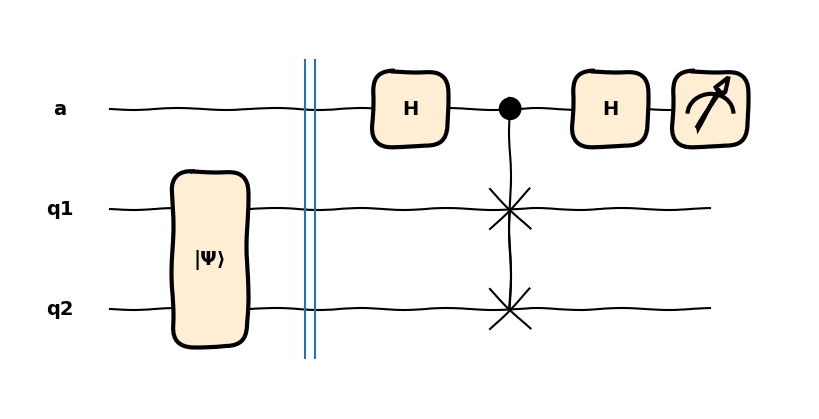

In [10]:
a = np.array([1, 1])
b = np.array([1, -1])
qml.draw_mpl(swap_test_circuit)(a, b)
plt.show()

In [11]:
def swap_test(a,b):
    p0 = swap_test_circuit(a,b)[0]
    return 2*p0 - 1

In [12]:
swap_test(a,b)

tensor(-6.66133815e-16, requires_grad=True)

In [13]:
def cos_sin_state(theta):
    return np.array([np.cos(theta), np.sin(theta)])

def sin_cos_state(theta):
    return np.array([np.sin(theta), np.cos(theta)])

$$
\begin{aligned}
\sin(\alpha + \beta) &= \sin\alpha \cos\beta + \cos\alpha \sin\beta \\
&= [\sin\alpha, \cos\alpha] \cdot [\cos\beta, \sin\beta]
\end{aligned}
$$

In [14]:
alpha = np.pi / 12
beta = np.pi / 6

a = sin_cos_state(alpha)
b = cos_sin_state(beta)

swap_test(a,b) # (sin(alpha+beta) = sin(pi/4) = 1/sqrt(2))^2

tensor(0.5, requires_grad=True)